# Data Extract and Transform Process

In [1]:
# import statements
import pandas as pd
import numpy as np
import seaborn as sns
from  datetime import datetime

### Cleaning the Comments Dataset

In [2]:
# read comments data
comments = pd.read_json('trp_comments.json')

In [3]:
comments.columns.unique()

Index(['author', 'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'body', 'created_utc',
       'gildings', 'id', 'is_submitter', 'link_id', 'locked', 'no_follow',
       'parent_id', 'permalink', 'retrieved_on', 'score', 'send_replies',
       'stickied', 'subreddit', 'subreddit_id', 'updated_utc', 'distinguished',
       'author_created_utc', 'can_gild', 'collapsed', 'collapsed_reason',
       'controversiality', 'gilded', 'nest_level', 'reply_delay',
       'subreddit_name_prefixed', 'subreddit_type', 'user_removed', 'edited',
       'mod_removed', 'author_cakeday', 'score_hidden', 'rte_mode',
       'all_awardings', 'associated_award', 'author_premium', 'awarders',
       'collapsed_because_crowd_control', 'total_awards_received',
       'treatment_tags', 'top_awarded_type'],
      dtype='

In [4]:
# filter to relevant columns
comments = comments[['id', 'created_utc','user_removed', 'author', 'author_fullname', 'body']]

In [5]:
comments.head()

,id,created_utc,user_removed,author,author_fullname,body
0,elpa5o3,1556150247,NaN,MCATL2244,t2_2dedl9be,Thanks again for your reply. Do you think the ...
1,elp90h2,1556149433,NaN,The-Peter-Principle,t2_typex,No way “Lawrence” is real. Too much of a cardb...
2,elp8zc6,1556149410,NaN,DeGENZerate,t2_1zs412ua,Trannies are disgusting and everyone here agre...
3,elp8rhe,1556149249,NaN,Gods_ssoldiers,t2_3n22trb1,Can you PM me who you're talking about?
4,elp8qte,1556149236,NaN,EdmondDaunts,t2_r8yzo,"Wonder Woman is a goddess, literally. So she r..."


In [6]:
# set index to comment id
comments.set_index('id', inplace=True)

In [7]:
# Change from POSIX time to human-readable format
comments['datetime'] = pd.to_datetime(comments['created_utc'], infer_datetime_format=True, unit='s')
comments['date'] = pd.to_datetime(comments['datetime']).dt.date
comments['day'] = pd.to_datetime(comments['datetime']).dt.day
comments['month'] = pd.to_datetime(comments['datetime']).dt.month
comments['year'] = pd.to_datetime(comments['datetime']).dt.year

In [8]:
comments.head()

,created_utc,user_removed,author,author_fullname,body,datetime,date,day,month,year
id,,,,,,,,,,
elpa5o3,1556150247,NaN,MCATL2244,t2_2dedl9be,Thanks again for your reply. Do you think the ...,2019-04-24 23:57:27,2019-04-24,24,4,2019
elp90h2,1556149433,NaN,The-Peter-Principle,t2_typex,No way “Lawrence” is real. Too much of a cardb...,2019-04-24 23:43:53,2019-04-24,24,4,2019
elp8zc6,1556149410,NaN,DeGENZerate,t2_1zs412ua,Trannies are disgusting and everyone here agre...,2019-04-24 23:43:30,2019-04-24,24,4,2019
elp8rhe,1556149249,NaN,Gods_ssoldiers,t2_3n22trb1,Can you PM me who you're talking about?,2019-04-24 23:40:49,2019-04-24,24,4,2019
elp8qte,1556149236,NaN,EdmondDaunts,t2_r8yzo,"Wonder Woman is a goddess, literally. So she r...",2019-04-24 23:40:36,2019-04-24,24,4,2019


In [9]:
# figure out how many comments are removed to be used in future parsing
# if comment is removed, we will not use it for toxicity parsing

# number of comments that weren't removed
comments['user_removed'].isnull().sum()

189806

In [10]:
# total number of rows
len(comments['user_removed'])

200139

In [11]:
# calculate percentage of rows with no body data
# (num of comments that were removed / total comments) * 100
((200139-189806)/200139)*100

5.16291177631546

~5.17% of all comments in the dataset do not have text that can be parsed

In [12]:
# fill nulls with 0 to make column binary 
comments.fillna({'user_removed': 0}, inplace=True)

### Cleaning the Submissions Dataset

In [13]:
submissions = pd.read_json('trp_submissions.json')

In [14]:
submissions.columns.unique()

Index(['author', 'author_flair_css_class', 'author_flair_richtext',
       'author_flair_text', 'author_flair_type', 'brand_safe', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'id',
       'is_crosspostable', 'is_original_content', 'is_reddit_media_domain',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'retrieved_on',
       'rte_mode', 'score', 'selftext', 'send_replies', 'spoiler', 'stickied',
       'subreddit', 'subreddit_id', 'subreddit_subscribers', 'subreddit_type',
       'thumbnail', 'title', 'url', 'whitelist_status', 'edited',
       'author_flair_background_color', 'author_flair_text_color', 'banned_by',
       'post_hint', 'preview', 'distinguished',

In [15]:
# filter to relevant columns
submissions = submissions[['id', 'created_utc', 'author', 'selftext']]

In [16]:
# set submissions index
submissions.set_index('id', inplace=True)

In [17]:
submissions.head()

,created_utc,author,selftext
id,,,
8blq21,1523489914,Heathcliff--,Just fucking lift already.\n\nThe vast majorit...
8bl1d2,1523484118,timber_ghost,[removed]
8bknm0,1523481125,Leg_Of_Lamb,[removed]
8bkimw,1523480066,SexdictatorLucifer,"A long time ago, the human male decided to emb..."
8bk5r4,1523477234,stacysmomlovesme,I recently wrote how water fasting can improve...


In [18]:
# Change from POSIX time to human-readable format
submissions['datetime'] = pd.to_datetime(submissions['created_utc'], infer_datetime_format=True, unit='s')
submissions['date'] = pd.to_datetime(submissions['datetime']).dt.date
submissions['day'] = pd.to_datetime(submissions['datetime']).dt.day
submissions['month'] = pd.to_datetime(submissions['datetime']).dt.month
submissions['year'] = pd.to_datetime(submissions['datetime']).dt.year

In [19]:
# determine how many submissions were removed/no longer viewable
len(submissions[submissions['selftext']==('[removed]')])

3646

In [20]:
# number of rows
submissions.shape[0]

7118

3646 out of 7118 rows (~51%) have had their posts removed.

This is too large of a missing dataset.

# Data Sanity Check

Checking to see which months have missing data in the collection process

In [21]:
comments.groupby([comments['year'], comments['month']]).size()

year  month
2018  4        26678
      5        30311
      6        30677
      7        28616
      8        22791
      9        23387
      10       10862
      11        9774
      12       10935
2019  4         6108
dtype: int64

In [22]:
submissions.groupby([submissions['year'], submissions['month']]).size()

year  month
2018  3         833
      4         951
      5        1067
      6         976
      7        1071
      8         930
      9         870
2019  2         231
      4         189
dtype: int64

<AxesSubplot:xlabel='year,month'>

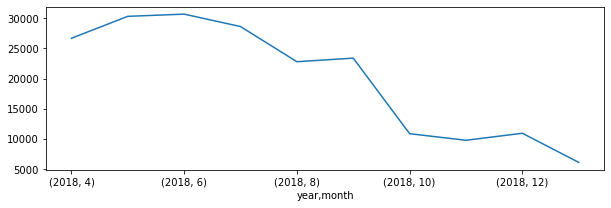

In [23]:
comments.groupby([comments['year'], comments['month']]).size().plot(figsize=(10,3))

<AxesSubplot:xlabel='year,month'>

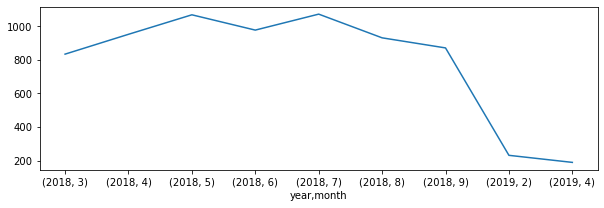

In [24]:
submissions.groupby([submissions['year'], submissions['month']]).size().plot(figsize=(10,3))